Definition of Outliers

An outlier is a data point that is significantly different from the rest of the data.

It lies far away from most other observations.

It may be due to natural variation, errors, or rare events.

Outliers can bias statistical results and affect machine learning models.



Types of Outliers

1:Global Outliers (Point Anomalies)

A data point that is far from all other data points.

Example: A person’s weight recorded as 500 kg in a dataset of normal adult weights.

Contextual Outliers (Conditional Anomalies)

An observation that is unusual in a specific context.

Example: 5°C in summer is abnormal, but normal in winter.

2:Collective Outliers

A group of data points that are unusual together, even if individual points are not.

Example: A sequence of sudden spikes in network traffic → may indicate a cyber attack.

3:Local Outliers

A point that is normal globally but unusual in its neighborhood (subset).

Example: 200 cm tall person is fine globally, but in a dataset of a specific classroom, it’s unusual.

Any many others/........



Causes of Outliers

Measurement errors (e.g., typo: 10000 instead of 1000).

Data entry errors.

Natural variation (e.g., extremely tall or short people).

Fraud or rare events (e.g., abnormal credit card transactions).

How to Detect Outliers

Statistical Methods

Z-score (>3 or <-3 = outlier).

IQR (Interquartile Range rule: values outside Q1 - 1.5×IQR or Q3 + 1.5×IQR).

Visualization

Boxplot, scatter plot, histogram.

Machine Learning

Isolation Forest, DBSCAN, LOF (Local Outlier Factor).

Any others methods as well.................

Handling and checking The ouliers using the z-score method

In [1]:
import numpy as np
import pandas as pd

In [4]:
#creating the data with outliers
data = pd.DataFrame({'value': [10, 12, 12, 13, 12, 11, 14, 13, 100]})
print("Original Data:")
print(data)

Original Data:
   value
0     10
1     12
2     12
3     13
4     12
5     11
6     14
7     13
8    100


In [5]:
#lets check for outliers using z-score method
#z-score = (X - mean) / std_dev
mean = data['value'].mean()
std = data['value'].std()
data['z_score'] = (data['value'] - mean) / std
print("\nData with Z-scores:")  
print(data)


Data with Z-scores:
   value   z_score
0     10 -0.405558
1     12 -0.337334
2     12 -0.337334
3     13 -0.303221
4     12 -0.337334
5     11 -0.371446
6     14 -0.269109
7     13 -0.303221
8    100  2.664557


In [9]:
#lets filter out the outliers
threshold = 2
data = data[data['z_score']<=threshold]
print("\nData after removing outliers:")
print(data)


Data after removing outliers:
   value   z_score
0     10 -0.405558
1     12 -0.337334
2     12 -0.337334
3     13 -0.303221
4     12 -0.337334
5     11 -0.371446
6     14 -0.269109
7     13 -0.303221


Lets handle the outliers using z-score but with the scipy library

In [10]:
from scipy import stats

In [11]:
#data with outliers
data = pd.DataFrame({'value': [10, 12, 12, 13, 12, 11, 14, 13, 100]})
print("Original Data:")
print(data)

Original Data:
   value
0     10
1     12
2     12
3     13
4     12
5     11
6     14
7     13
8    100


In [12]:
#lets remove the outliers using z-score from scipy
data['z_score'] = np.abs(stats.zscore(data['value']))
data = data[data['z_score']<=2]
print("\nData after removing outliers using scipy:")
print(data)


Data after removing outliers using scipy:
   value   z_score
0     10  0.430160
1     12  0.357796
2     12  0.357796
3     13  0.321615
4     12  0.357796
5     11  0.393978
6     14  0.285433
7     13  0.321615


Lets Visulaize the Outliers using the diff Plots....

In [22]:
#data with outliers
data = pd.DataFrame({'value': [10, 12, 12, 13, 12, 11, 14, 13, 100]})
print("Original Data:")
print(data)

Original Data:
   value
0     10
1     12
2     12
3     13
4     12
5     11
6     14
7     13
8    100


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

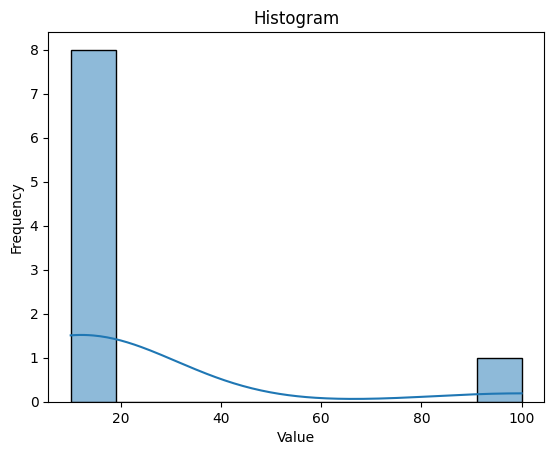

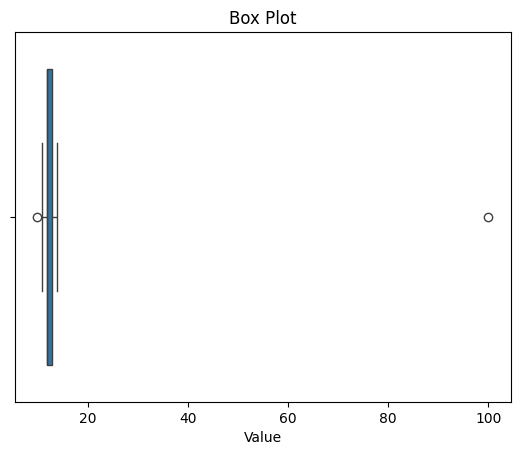

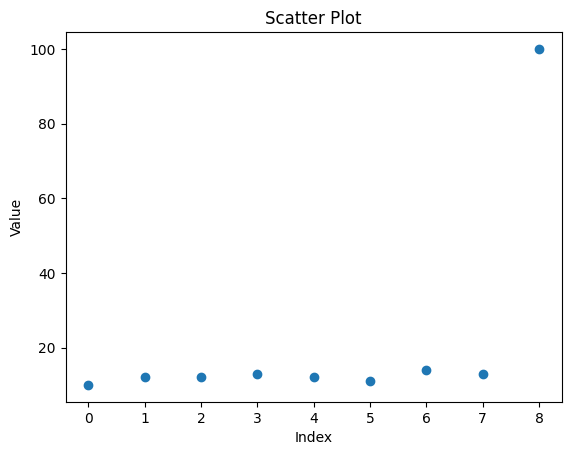

In [ ]:
#lets visulize the outliers

#Hist Plot

sns.histplot(data['value'], bins=10, kde=True)
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#Box Plot
sns.boxplot(x=data['value'])
plt.title('Box Plot')
plt.xlabel('Value')
plt.show()

#Scatter Plot
plt.scatter(range(len(data)), data['value'])
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


#in the plots below we can see that the value 100 is an outlier as it is far away from the other values
#in histogram it is a separate peak and data is right skewed
#in box plot it is a point outside the whiskers
#in scatter plot it is a point far away from the other points

Now We will handle the Outliers using the IQR Method

In [25]:
#data with outliers
data = pd.DataFrame({'value': [10, 12, 12, 13, 12, 11, 14, 13, 100]})
print("Original Data:")
print(data)

Original Data:
   value
0     10
1     12
2     12
3     13
4     12
5     11
6     14
7     13
8    100


Definition

The IQR (Interquartile Range) is the range between the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile) of a dataset.

It measures the spread of the middle 50% of the data.

𝐼
𝑄
𝑅
=
𝑄
3
−
𝑄
1
IQR=Q3−Q1
2. Outlier Detection Rule

A data point is considered an outlier if it lies outside the range:

Lower Bound
=
𝑄
1
−
1.5
×
𝐼
𝑄
𝑅
Lower Bound=Q1−1.5×IQR
Upper Bound
=
𝑄
3
+
1.5
×
𝐼
𝑄
𝑅
Upper Bound=Q3+1.5×IQR

Anything below Lower Bound → Outlier

Anything above Upper Bound → Outlier

In [27]:
#lets handle the Outliers using the IQR Method

#Box Plot show use the same IQR method to identify outliers
#IQR = Q3 - Q1
#Lower Bound = Q1 - 1.5 * IQR
#Upper Bound = Q3 + 1.5 * IQR
#Any data point outside this range is considered an outlier
Q1 = data['value'].quantile(0.25)
Q3 = data['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['value'] >= lower_bound) & (data['value'] <= upper_bound)]
print("\nData after removing outliers using IQR method:")
print(data)


Data after removing outliers using IQR method:
   value
1     12
2     12
3     13
4     12
5     11
6     14
7     13


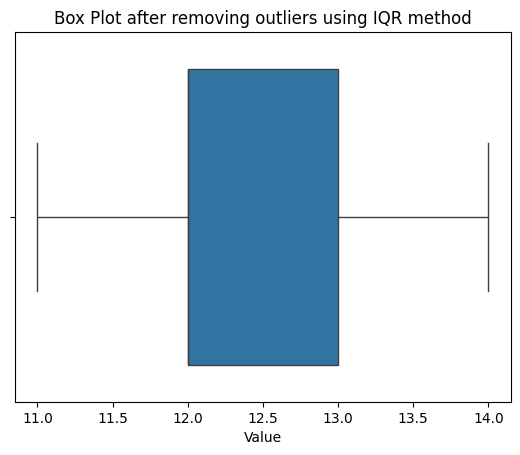

In [ ]:
#lets visualize the outliers using box plot after removing outliers using IQR method
sns.boxplot(x=data['value'])
plt.title('Box Plot after removing outliers using IQR method')
plt.xlabel('Value')
plt.show()

#As you can see the outlier 100 is removed from the box plot